<a href="https://colab.research.google.com/github/JakeOh/202011_itw_pyml_wkd/blob/main/ml03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grdient Descent(경사 하강법)

* 함수의 최솟값을 찾기 위해서
    1. 임의의 점에서 시작
    2. 그 점에서 gradient(기울기) 계산
    3. gradient의 반대 방향으로 점을 이동
    4. 1 ~ 3 과정을 반복하면 최솟값의 위치를 찾게 됨.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

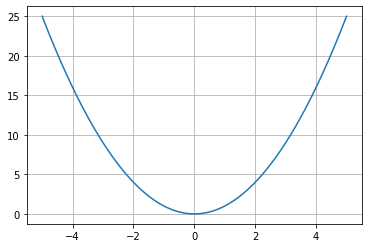

In [ ]:
# y = x ** 2 의 최솟값의 위치
x_pts = np.linspace(-5, 5, 1000)
y_pts = x_pts ** 2  # 미분: 접선의 기울기. 2 * x_pts

plt.plot(x_pts, y_pts)

plt.grid()
plt.show()

In [ ]:
def fn(x):
    return x ** 2

In [ ]:
def gradient(x):
    return 2 * x

In [ ]:
def plot_fn(fn):
    x_pts = np.linspace(-5, 5, 1000)
    y_pts = fn(x_pts)

    plt.plot(x_pts, y_pts)
    plt.grid()

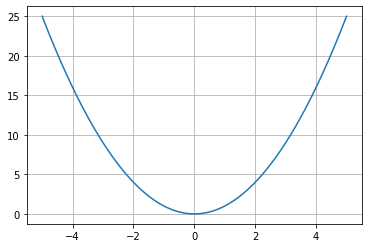

In [ ]:
plot_fn(fn)

In [ ]:
def plot_gradient_descent(fn, x_init, n_iter=5, eta=0.1):
    plot_fn(fn)  # 함수를 그래프로 그림.

    x = x_init  # 최솟값을 찾아가기 위한 초깃값.
    y = fn(x)  # 초기 위치에서의 함수 fn의 반환 값.
    plt.plot(x, y, 'k.', markersize=20)

    for epoch in range(n_iter):
        # gradient(기울기)의 반대방향으로 x를 이동.
        x_new = x - eta * gradient(x)  
        y_new = fn(x_new)
        plt.plot(x_new, y_new, '.', markersize=20,
                 label=f'Epoch {epoch + 1}')
        x = x_new

    plt.legend()

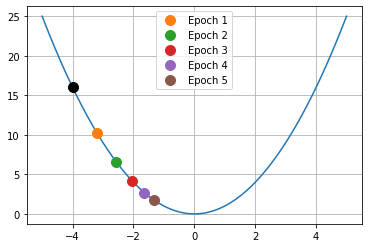

In [ ]:
plot_gradient_descent(fn, x_init=-4)

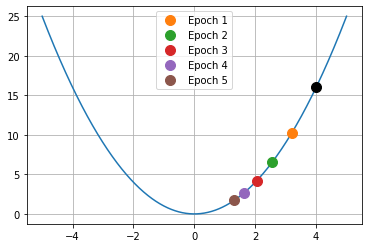

In [ ]:
plot_gradient_descent(fn, x_init=4)

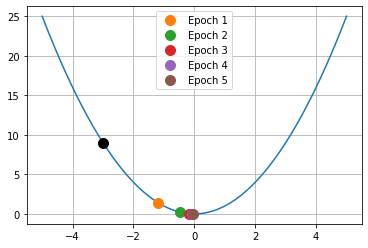

In [ ]:
plot_gradient_descent(fn, x_init=-3, eta=0.3)
# eta(학습률): eta가 클 수록 더 빨리 최솟값의 위치로 찾아감.

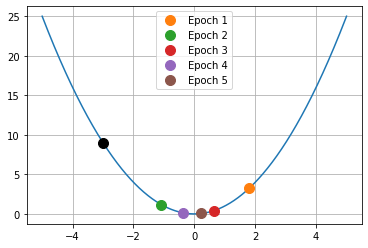

In [ ]:
plot_gradient_descent(fn, x_init=-3, eta=0.8)

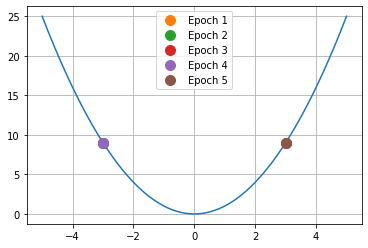

In [ ]:
plot_gradient_descent(fn, x_init=-3, eta=1.0)

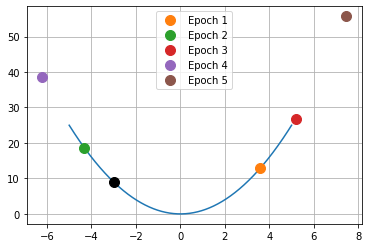

In [ ]:
plot_gradient_descent(fn, x_init=-3, eta=1.1)

# 배치 경사 하강법

* 경사하강법을 사용한 선형 회귀 방정식의 절편, 기울기 찾기:
    * 선형 회귀 방정식: y_hat = b0 + b1 * x
    * 절편(intercept, bias 편향): b0
    * 기울기(coefficinet): b1
* 경사하강법의 목적:
    * MSE = (1/m) SUM_i [(y_i - y_hat_i) ** 2]를 최소화

In [2]:
np.random.seed(1)

X = np.arange(0, 3).reshape((3, 1))  # 2d array
y = 4 + 3 * X + np.random.randn(3, 1)

In [3]:
X

array([[0],
       [1],
       [2]])

In [4]:
y

array([[5.62434536],
       [6.38824359],
       [9.47182825]])

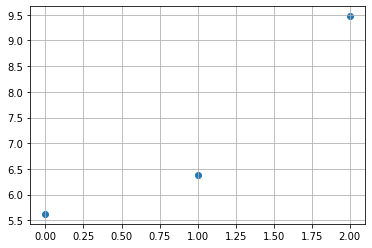

In [5]:
plt.scatter(X, y)
plt.grid()

In [6]:
# (3, 2) shape 2d array
X_b = np.c_[np.ones(shape=(3, 1)), X]
X_b

array([[1., 0.],
       [1., 1.],
       [1., 2.]])

In [7]:
learning_rate = 0.1  # 학습률
m = 3  # 샘플 개수
n_iteration = 1_000  # 반복 횟수

np.random.seed(1)
theta = np.random.randn(2, 1)  # [[b0], [b1]] 초깃값 - 임의의 난수로 만듦.
theta

array([[ 1.62434536],
       [-0.61175641]])

In [8]:
for epoch in range(n_iteration):
    gradient = (2/m) * X_b.T @ (X_b @ theta - y)
    theta = theta - learning_rate * gradient
    
theta

array([[5.23773096],
       [1.92374144]])

In [9]:
y_hat = X_b @ theta  # 예측값
y_hat

array([[5.23773096],
       [7.1614724 ],
       [9.08521384]])

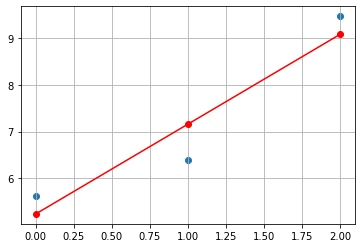

In [11]:
plt.scatter(X, y)
plt.plot(X, y_hat, 'r-', marker='o')
plt.grid()

# 확률적 경사 하강법(SGD: Stochastic Gradient Descent)

In [12]:
np.random.seed(1)

m = 100  # 샘플 개수
X = 2 * np.random.rand(m, 1)  # (m, 1) shape의 2d array
y = 4 + 3 * X + np.random.randn(m, 1)

X.shape, y.shape

((100, 1), (100, 1))

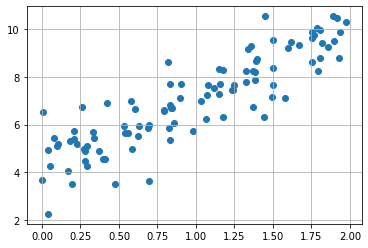

In [13]:
plt.scatter(X, y)
plt.grid()

In [16]:
X_b = np.c_[np.ones(shape=(m, 1)), X]  # bias가 추가된 샘플 행렬
theta = np.random.randn(2, 1)  # 선형 회귀 방정식에서 b0, b1의 초깃값

learning_rate = 0.01  # 학습률
n_iteration = 50  # 전체 반복 횟수(모든 샘플에서 gradient가 갱신되는 횟수)
for epoch in range(n_iteration):  # 전체 반복 횟수만큼 반복
    for i in range(m):  # 샘플 개수만큼 반복
        rand_idx = np.random.randint(m)  # 0 <= rand_idx < m 범위의 난수.
        xi = X_b[rand_idx:(rand_idx + 1)]  # 샘플 1개 선택.
        yi = y[rand_idx:(rand_idx + 1)]  # 샘플과 같은 인덱스에 있는 레이블.
        gradient = 2 * xi.T @ (xi @ theta - yi)  # 선택된 샘플에서의 gradient를 계산.
        theta = theta - learning_rate * gradient  # theta를 업데이트.

theta

array([[4.16520164],
       [2.90147292]])

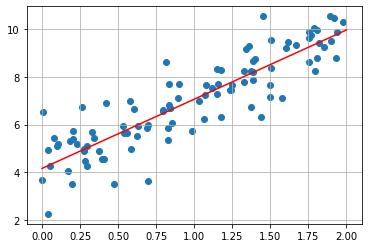

In [18]:
X_new = np.array([[1, 0],
                  [1, 2]])
y_hat = X_new @ theta

plt.scatter(X, y)
plt.plot([[0], [2]], y_hat, 'r-')
plt.grid()

In [19]:
from sklearn.linear_model import SGDRegressor

In [22]:
sgd_reg = SGDRegressor(max_iter=50, eta0=0.01)  # 모델 생성
sgd_reg.fit(X, y.ravel())  # 모델 학습
sgd_reg.intercept_, sgd_reg.coef_

(array([3.89179496]), array([3.13849632]))

# 다항 회귀(Polynomial Regression)

* 2차 다항 회귀식: y_hat = b0 + b1 * x + b2 * x**2

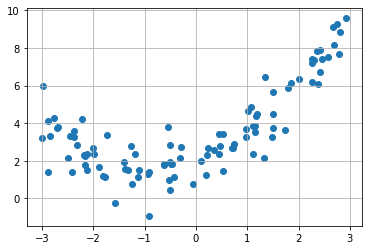

In [23]:
np.random.seed(1)

m = 100  # 샘플 개수
X = 6 * np.random.rand(m, 1) - 3  # -3 <= X < 3 범위의 난수 100개 2d array 샘플 데이터
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.grid()

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[:5]

array([[-0.49786797,  0.24787252],
       [ 1.32194696,  1.74754377],
       [-2.99931375,  8.99588298],
       [-1.18600456,  1.40660683],
       [-2.11946466,  4.49213042]])

In [28]:
sgd_reg = SGDRegressor()  # 모델 생성
sgd_reg.fit(X_poly, y.ravel())  # 2차항이 포함된 데이터로 모델 훈련
# y_hat = b0 + b1 * x + b2 * x**2
sgd_reg.intercept_, sgd_reg.coef_

(array([1.87785006]), array([0.95515989, 0.55979806]))

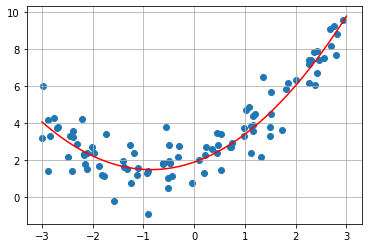

In [29]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = sgd_reg.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-')

plt.scatter(X, y)
plt.grid()

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

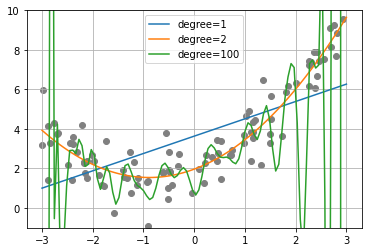

In [38]:
# 선형 회귀, 2차 다항 회귀, 100차 다항 회귀 결과 비교 - overfitting(과적합)
plt.scatter(X, y, c='gray')

for degree in [1, 2, 100]:
    # 다차항 파생 변수를 추가하기 위한 변환기
    poly_features = PolynomialFeatures(degree, include_bias=False)
    # 다차항 파생 변수들을 특성 스케일하기 위한 스케일러
    std_scaler = StandardScaler()
    # LinearRegression: 모델
    lin_reg = LinearRegression()
    # Pipeline 생성
    model = Pipeline(steps=[('poly', poly_features),
                            ('scaler', std_scaler),
                            ('reg', lin_reg)])
    # 모델 훈련
    model.fit(X, y)
    # 훈련된 모델로 예측
    y_new = model.predict(X_new)
    plt.plot(X_new, y_new, label=f'degree={degree}')

plt.grid()
plt.axis(ymin=-1, ymax=10)
plt.legend()